In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import rfft

In [ ]:
def pure_tone_sine(freq, time_vec):
    return np.sin(2*np.pi*freq*time_vec)

In [ ]:
t = np.linspace(0, 10, 1000)

In [ ]:
sin_100Hz = pure_tone_sine(100, t)
sin_500Hz = pure_tone_sine(500, t)

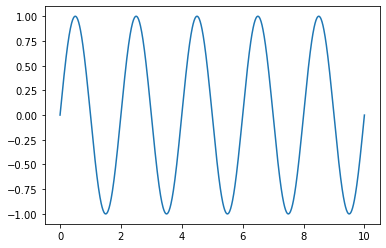

In [ ]:
plt.plot(t, sin_500Hz)

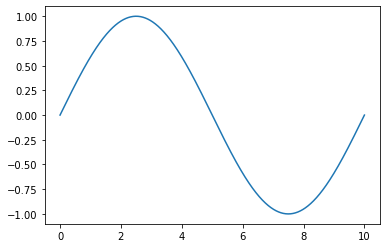

In [ ]:
plt.plot(t, sin_100Hz)

In [ ]:
def power_spectral_density(data, dt):

    """
    Plot the power spectral density and data time series as subplots of a single figure.
    
    Args:
    data (numpy array) - Time series data
    dt (float) - Sampling period
    """

    n = len(data)
    f = data.reshape(-1, )
    fhat = rfft(f, n)
    PSD = fhat * np.conj(fhat) / n
    freq = (1/(dt*n)) * np.arange(len(PSD))
    L = np.arange(1, np.floor(n/2), dtype=int)

    fig, ax = plt.subplots(2,1)

    plt.sca(ax[0])
    plt.plot(data)
    plt.xlabel("Time (s)")
    plt.ylabel("Raw Data")


    plt.sca(ax[1])
    plt.plot(freq[L], PSD[L])
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Magnitude")

    plt.show()

    return 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


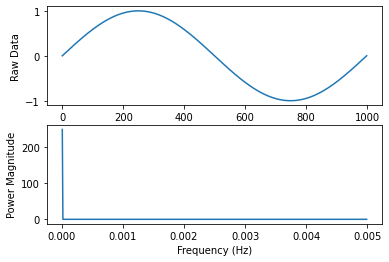

In [ ]:
power_spectral_density(sin_100Hz, 100)

In [ ]:
freqs, psd = signal.welch(sin_100Hz)

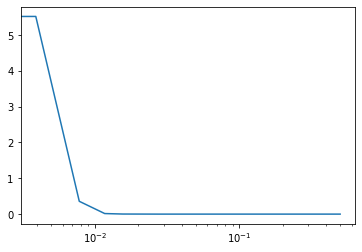

In [ ]:
plt.semilogx(freqs, psd)

In [ ]:
!pip install allantools

In [ ]:
import allantools

In [ ]:
white = allantools.noise.white()

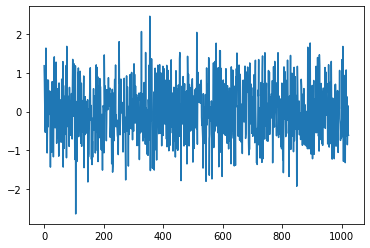

In [ ]:
plt.plot(white)

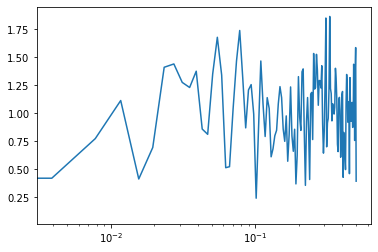

In [ ]:
freqs, psd = signal.welch(white)
plt.semilogx(freqs, psd)

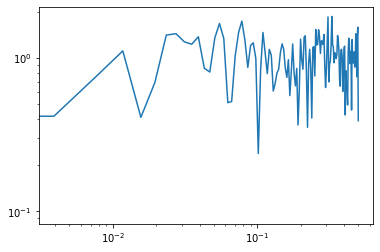

In [ ]:
plt.loglog(freqs, psd)

In [ ]:
pink = allantools.noise.pink(depth=5000)
len(pink)

1024

In [ ]:
freqs, psd = signal.welch(pink)

In [ ]:
len(freqs)==len(psd)

True

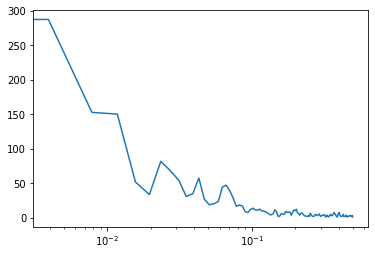

In [ ]:
plt.semilogx(freqs,psd)

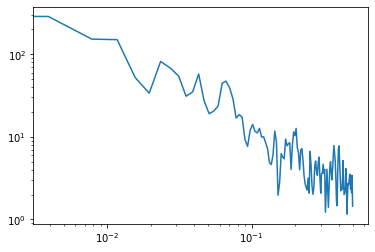

In [ ]:
plt.loglog(freqs, psd)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


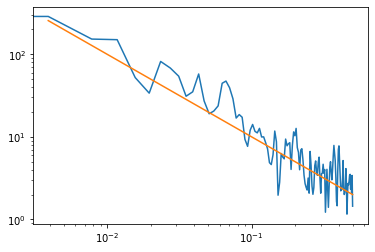

In [ ]:
plt.loglog(freqs, psd)
plt.loglog(freqs, np.power(freqs, -1.0))

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/LoggedSingleAxisGyroscope.csv", names=["Data"]).to_numpy()

In [ ]:
data = data.reshape(-1, )

In [ ]:
freqs, psd = signal.welch(data, fs=100)

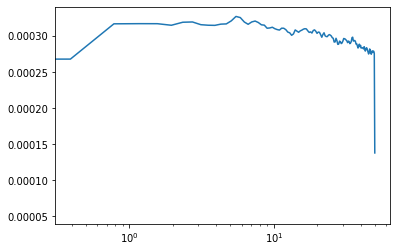

In [ ]:
plt.semilogx(freqs, psd)

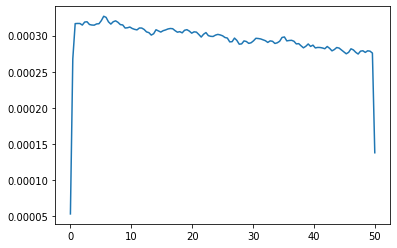

In [ ]:
plt.plot(freqs, psd)